# Connect MyDrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/192s2a

/content/drive/.shortcut-targets-by-id/1_BX7ckacxXeQEMsZRfR8HGKcNpS5-v5I/192s2a


#  setup

In [ ]:
# 설치
!git clone https://github.com/SHI-Labs/OneFormer-Colab.git
! mv OneFormer-Colab OneFormer
%cd /content/drive/MyDrive/192s2a/OneFormer

Cloning into 'OneFormer-Colab'...
remote: Enumerating objects: 141, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 141 (delta 6), reused 6 (delta 6), pack-reused 128
Receiving objects: 100% (141/141), 6.73 MiB | 4.82 MiB/s, done.
Resolving deltas: 100% (34/34), done.
/content/drive/.shortcut-targets-by-id/1_BX7ckacxXeQEMsZRfR8HGKcNpS5-v5I/192s2a/OneFormer


In [ ]:
!pip3 install -U opencv-python --quiet
!pip3 install natten -f https://shi-labs.com/natten/wheels/cu113/torch1.10.1/index.html --quiet

# # # Install other dependencies
!pip3 install git+https://github.com/cocodataset/panopticapi.git --quiet
!pip3 install git+https://github.com/mcordts/cityscapesScripts.git --quiet

!pip3 install -r requirements.txt --quiet
!pip3 install ipython-autotime --quiet
!pip3 install imutils --quiet
!pip install timm
!pip install wandb
!pip install diffdist
!pip install einops
!pip install ftfy
!pip install diffdist

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.6/801.6 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.8/144.8 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.9/225.9 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 77.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━

In [ ]:
import sys, os, distutils.core
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])} --quiet
sys.path.insert(0, os.path.abspath('./detectron2'))

fatal: destination path 'detectron2' already exists and is not an empty directory.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 69.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
setup_logger(name="oneformer")

# Import libraries
import numpy as np
import cv2
import torch
from google.colab.patches import cv2_imshow
import imutils

# Import detectron2 utilities
from detectron2.config import get_cfg
from detectron2.projects.deeplab import add_deeplab_config
from detectron2.data import MetadataCatalog
from demo.defaults import DefaultPredictor
from demo.visualizer import Visualizer, ColorMode


# import OneFormer Project
from oneformer import (
    add_oneformer_config,
    add_common_config,
    add_swin_config,
    add_dinat_config,
    add_convnext_config,
)

In [ ]:
cpu_device = torch.device("cpu")
SWIN_CFG_DICT = {"cityscapes": "configs/cityscapes/oneformer_swin_large_IN21k_384_bs16_90k.yaml",
            "coco": "configs/coco/oneformer_swin_large_IN21k_384_bs16_100ep.yaml",
            "ade20k": "configs/ade20k/oneformer_swin_large_IN21k_384_bs16_160k.yaml",}

DINAT_CFG_DICT = {"cityscapes": "configs/cityscapes/oneformer_dinat_large_bs16_90k.yaml",
            "coco": "configs/coco/oneformer_dinat_large_bs16_100ep.yaml",
            "ade20k": "configs/ade20k/oneformer_dinat_large_IN21k_384_bs16_160k.yaml",}

def setup_cfg(dataset, model_path, use_swin):
    # load config from file and command-line arguments
    cfg = get_cfg()
    add_deeplab_config(cfg)
    add_common_config(cfg)
    add_swin_config(cfg)
    add_dinat_config(cfg)
    add_convnext_config(cfg)
    add_oneformer_config(cfg)
    if use_swin:
      cfg_path = SWIN_CFG_DICT[dataset]
    else:
      cfg_path = DINAT_CFG_DICT[dataset]
    cfg.merge_from_file(cfg_path)
    cfg.MODEL.DEVICE = 'cpu'
    cfg.MODEL.WEIGHTS = model_path
    cfg.freeze()
    return cfg

def setup_modules(dataset, model_path, use_swin):
    cfg = setup_cfg(dataset, model_path, use_swin)
    predictor = DefaultPredictor(cfg)
    metadata = MetadataCatalog.get(
        cfg.DATASETS.TEST_PANOPTIC[0] if len(cfg.DATASETS.TEST_PANOPTIC) else "__unused"
    )
    if 'cityscapes_fine_sem_seg_val' in cfg.DATASETS.TEST_PANOPTIC[0]:
        from cityscapesscripts.helpers.labels import labels
        stuff_colors = [k.color for k in labels if k.trainId != 255]
        metadata = metadata.set(stuff_colors=stuff_colors)

    return predictor, metadata

def panoptic_run(img, predictor, metadata):
    visualizer = Visualizer(img[:, :, ::-1], metadata=metadata, instance_mode=ColorMode.IMAGE)
    predictions = predictor(img, "panoptic")
    panoptic_seg, segments_info = predictions["panoptic_seg"]
    out = visualizer.draw_panoptic_seg_predictions(
    panoptic_seg.to(cpu_device), segments_info, alpha=0.5
)
    return out

def instance_run(img, predictor, metadata):
    visualizer = Visualizer(img[:, :, ::-1], metadata=metadata, instance_mode=ColorMode.IMAGE)
    predictions = predictor(img, "instance")
    instances = predictions["instances"].to(cpu_device)
    out = visualizer.draw_instance_predictions(predictions=instances, alpha=0.5)
    return out

def semantic_run(img, predictor, metadata):
    visualizer = Visualizer(img[:, :, ::-1], metadata=metadata, instance_mode=ColorMode.IMAGE)
    predictions = predictor(img, "semantic")
    out = visualizer.draw_sem_seg(
        predictions["sem_seg"].argmax(dim=0).to(cpu_device), alpha=0.5
    )
    return out

TASK_INFER = {"panoptic": panoptic_run,
              "instance": instance_run,
              "semantic": semantic_run}

In [ ]:
use_swin = False

In [ ]:
import os
import subprocess
if not use_swin:
  if not os.path.exists("150_16_dinat_l_oneformer_coco_100ep.pth"):
    subprocess.run('wget https://shi-labs.com/projects/oneformer/coco/150_16_dinat_l_oneformer_coco_100ep.pth', shell=True)
  predictor, metadata = setup_modules("coco", "150_16_dinat_l_oneformer_coco_100ep.pth", use_swin)
else:
  if not os.path.exists("150_16_swin_l_oneformer_coco_100ep.pth"):
    subprocess.run('wget https://shi-labs.com/projects/oneformer/coco/150_16_swin_l_oneformer_coco_100ep.pth', shell=True)
  predictor, metadata = setup_modules("coco", "150_16_swin_l_oneformer_coco_100ep.pth", use_swin)

[04/09 10:40:41 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from 150_16_dinat_l_oneformer_coco_100ep.pth ...


  text_encoder.positional_embedding
  text_encoder.transformer.resblocks.0.attn.{in_proj_bias, in_proj_weight}
  text_encoder.transformer.resblocks.0.attn.out_proj.{bias, weight}
  text_encoder.transformer.resblocks.0.ln_1.{bias, weight}
  text_encoder.transformer.resblocks.0.mlp.c_fc.{bias, weight}
  text_encoder.transformer.resblocks.0.mlp.c_proj.{bias, weight}
  text_encoder.transformer.resblocks.0.ln_2.{bias, weight}
  text_encoder.transformer.resblocks.1.attn.{in_proj_bias, in_proj_weight}
  text_encoder.transformer.resblocks.1.attn.out_proj.{bias, weight}
  text_encoder.transformer.resblocks.1.ln_1.{bias, weight}
  text_encoder.transformer.resblocks.1.mlp.c_fc.{bias, weight}
  text_encoder.transformer.resblocks.1.mlp.c_proj.{bias, weight}
  text_encoder.transformer.resblocks.1.ln_2.{bias, weight}
  text_encoder.transformer.resblocks.2.attn.{in_proj_bias, in_proj_weight}
  text_encoder.transformer.resblocks.2.attn.out_proj.{bias, weight}
  text_encoder.transformer.resblocks.2.ln_1

# Original_Image

# oneformer

#### OR

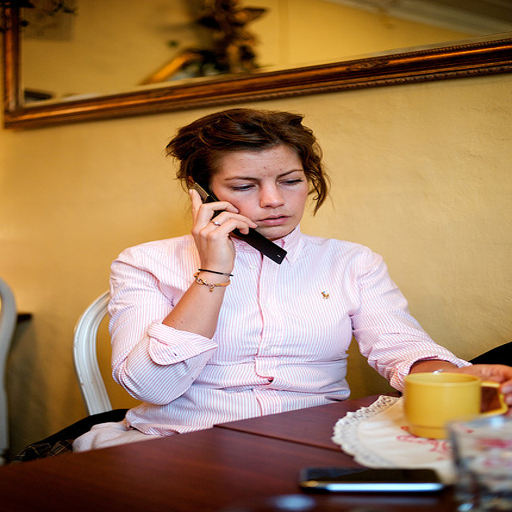

time: 128 ms (started: 2024-04-09 11:16:40 +00:00)


In [ ]:
from google.colab.patches import cv2_imshow

img = cv2.imread(f"/content/drive/MyDrive/192s2a/Data2/Original/resize/{img_num[:-4]}.png")
img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
cv2_imshow(img)

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime


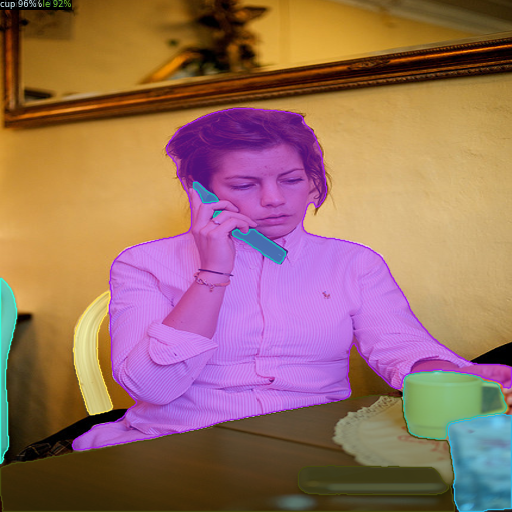

time: 13min 23s (started: 2024-04-09 11:18:46 +00:00)


In [ ]:
task = "instance"
%load_ext autotime
out = TASK_INFER[task](img, predictor, metadata).get_image()
cv2_imshow(out[:, :, ::-1])

In [ ]:
predictions = predictor(img, "instance")
instances = predictions["instances"].to(cpu_device)

time: 13min 19s (started: 2024-04-09 11:32:27 +00:00)


#### 보정해야 하는 object에 맞게 코드를 실행하세요

In [ ]:
metadata.thing_classes.index("person")

0

time: 4.54 ms (started: 2023-11-25 13:05:30 +00:00)


In [ ]:
instance = instances[instances.pred_classes == 0]

time: 2.27 ms (started: 2023-11-25 13:05:30 +00:00)


In [ ]:
ref_mask = instance[0].pred_masks.numpy()
ref_mask = ref_mask.astype(np.uint8)
ref_mask = np.squeeze(ref_mask)

time: 2.45 ms (started: 2023-11-25 13:05:37 +00:00)


In [ ]:
ref_mask = np.where(ref_mask==1, 255, ref_mask)
np.unique(ref_mask)

array([  0, 255], dtype=uint8)

time: 12 ms (started: 2023-11-25 13:05:38 +00:00)


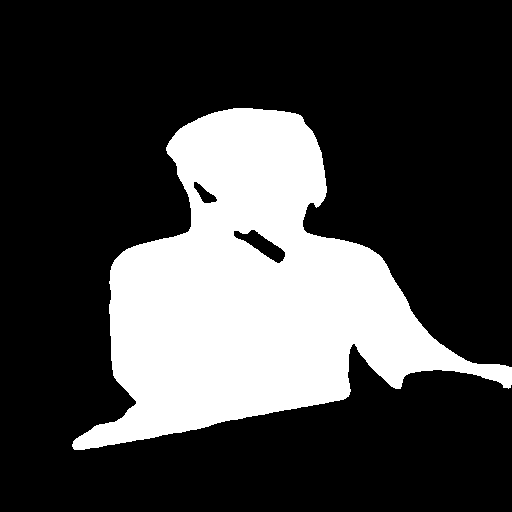

time: 7.79 ms (started: 2023-11-25 13:05:38 +00:00)


In [ ]:
cv2_imshow(ref_mask)

---

#### 추가 마스크1

In [ ]:
metadata.thing_classes.index("cell phone")

67

time: 2.98 ms (started: 2023-11-25 13:05:42 +00:00)


In [ ]:
instance1 = instances[instances.pred_classes == 67]

time: 1.86 ms (started: 2023-11-25 13:05:42 +00:00)


In [ ]:
ref_mask1 = instance1[1].pred_masks.numpy()
ref_mask1 = ref_mask1.astype(np.uint8)
ref_mask1 = np.squeeze(ref_mask1)

time: 3.9 ms (started: 2023-11-25 13:05:45 +00:00)


In [ ]:
ref_mask1 = np.where(ref_mask1==1, 255, ref_mask1)
np.unique(ref_mask1)

array([  0, 255], dtype=uint8)

time: 17.3 ms (started: 2023-11-25 13:05:46 +00:00)


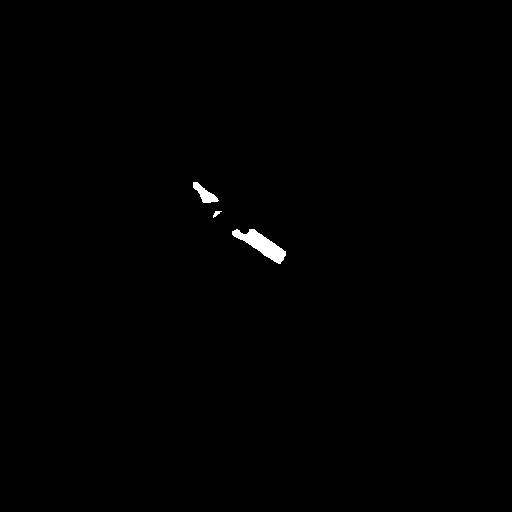

time: 9.31 ms (started: 2023-11-25 13:05:46 +00:00)


In [ ]:
cv2_imshow(ref_mask1)

#### 추가 마스크 2

In [ ]:
metadata.thing_classes.index("handbag")

26

time: 3.19 ms (started: 2023-11-25 13:04:52 +00:00)


In [ ]:
human = instances[instances.pred_classes == 26]

In [ ]:
ref_mask2 = human[0].pred_masks.numpy()
ref_mask2 = ref_mask2.astype(np.uint8)
ref_mask2 = np.squeeze(ref_mask2)

In [ ]:
ref_mask2 = np.where(ref_mask2==1, 255, ref_mask2)
np.unique(ref_mask2)

In [ ]:
cv2_imshow(ref_mask2)

### 합성 갯수에 맞게 합성

In [ ]:
com_mask = ref_mask+ref_mask1#+ref_mask2

time: 581 µs (started: 2023-11-25 13:05:50 +00:00)


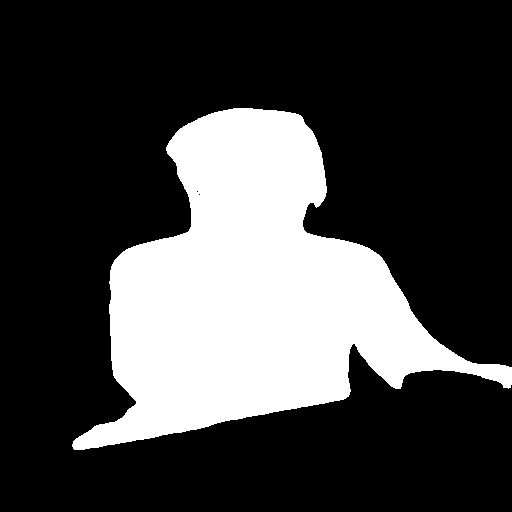

time: 8.24 ms (started: 2023-11-25 13:05:50 +00:00)


In [ ]:
#mask 확인
cv2_imshow(com_mask)

In [ ]:
#mask 저장
cv2.imwrite(f'/content/drive/MyDrive/192s2a/Data2/Original/oneformer/{img_num[:6]}_oneformer.png',com_mask)

True

time: 10.4 ms (started: 2023-11-25 13:05:51 +00:00)


# TriMap

In [ ]:
cd /content/drive/MyDrive/192s2a//trimap_generator/trimap_generator

/content/drive/MyDrive/192s2a/trimap_generator/trimap_generator
time: 3.15 ms (started: 2023-11-25 13:05:51 +00:00)


In [ ]:
%matplotlib inline
from trimap_module import trimap
import cv2, os, sys
import numpy as np
import matplotlib.pyplot as plt

time: 1.81 ms (started: 2023-11-25 13:05:52 +00:00)


In [ ]:
img = f'{img_num[:6]}_oneformer'
name = f'/content/drive/MyDrive/192s2a/Data2/Original/oneformer/{img}.png'
image = cv2.imread(name, cv2.IMREAD_GRAYSCALE)

size = 5;         # Unknown Region Thickness
title = f"{img}"
height, width = image.shape[:2]
trimap(image, title, size)

name  = f"./images/results/{size}px_{img}.png";
result = cv2.imread(name, cv2.IMREAD_GRAYSCALE)

time: 945 ms (started: 2023-11-25 13:05:52 +00:00)


# LAMA

## Make Background

In [ ]:
cd /content/drive/MyDrive/192s2a/lama

/content/drive/MyDrive/192s2a/lama
time: 2.31 ms (started: 2023-11-25 13:05:53 +00:00)


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread(f'/content/drive/MyDrive/192s2a/Data2/Original/resize/{img_num[:-4]}.png')
img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)

#ref_mask = cv2.imread(f'/content/drive/MyDrive/192s2a/Data2/Original/oneformer/{img_num[:6]}_oneformer.png', cv2.IMREAD_GRAYSCALE)
ref_mask = cv2.imread(f'/content/drive/MyDrive/192s2a/trimap_generator/trimap_generator/images/results/{size}px_{img_num[:6]}_oneformer.png', cv2.IMREAD_GRAYSCALE)
#ref_mask = cv2.rotate(ref_mask, cv2.ROTATE_90_COUNTERCLOCKWISE)

time: 29.5 ms (started: 2023-11-25 13:05:53 +00:00)


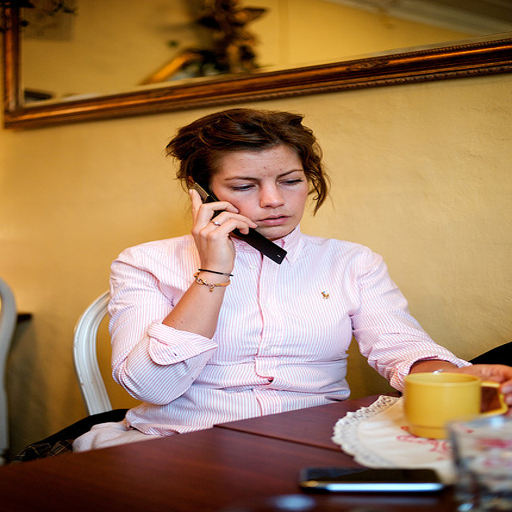

time: 149 ms (started: 2023-11-25 13:05:53 +00:00)


In [ ]:
cv2_imshow(img)

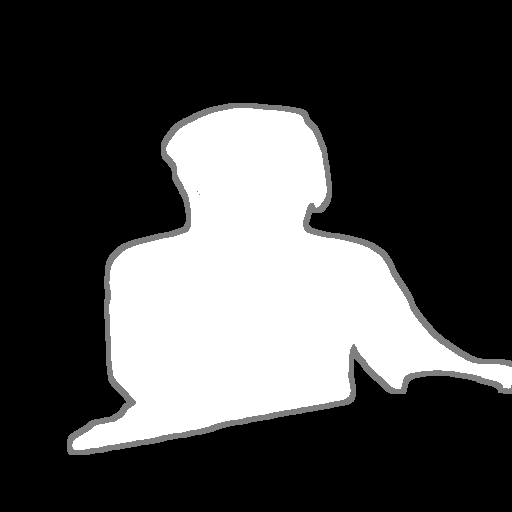

time: 12.2 ms (started: 2023-11-25 13:05:53 +00:00)


In [ ]:
cv2_imshow(ref_mask)

In [ ]:
ref_mask2 = np.where(ref_mask > 0, 255, ref_mask)
back_seg = np.where(ref_mask2 == 255, -1, ref_mask2)
back_seg = np.where(back_seg == 0, 255, back_seg)
back_seg = np.where(back_seg == -1, 0, back_seg)

time: 3.51 ms (started: 2023-11-25 13:05:53 +00:00)


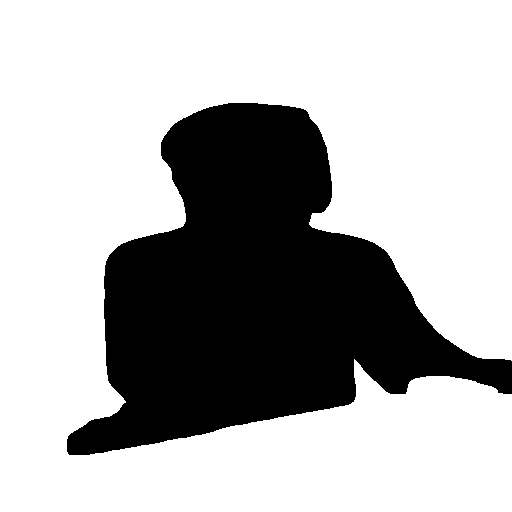

time: 11 ms (started: 2023-11-25 13:05:53 +00:00)


In [ ]:
cv2_imshow(back_seg)

In [ ]:
back_seg2 = np.where(back_seg==255,1,back_seg)

time: 1.94 ms (started: 2023-11-25 13:05:53 +00:00)


In [ ]:
back_img = back_seg2[:,:,np.newaxis] * img

time: 5.65 ms (started: 2023-11-25 13:05:54 +00:00)


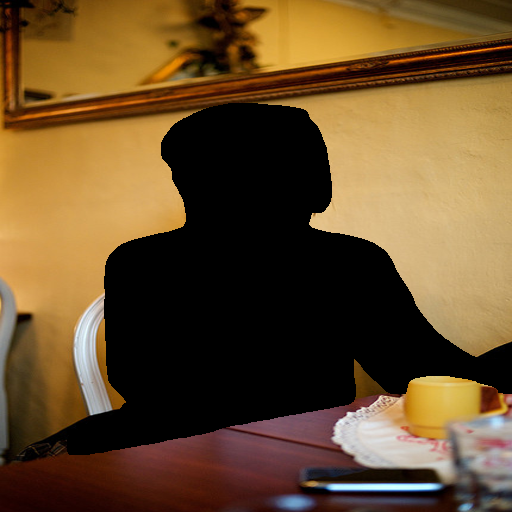

time: 119 ms (started: 2023-11-25 13:05:54 +00:00)


In [ ]:
cv2_imshow(back_img)

In [ ]:
import shutil
shutil.rmtree('/content/drive/MyDrive/192s2a/Data2/Original/lama/input')

time: 13.9 ms (started: 2023-11-25 13:05:54 +00:00)


In [ ]:
!mkdir /content/drive/MyDrive/192s2a/Data2/Original/lama/input

time: 104 ms (started: 2023-11-25 13:05:54 +00:00)


In [ ]:
cv2.imwrite(f'/content/drive/MyDrive/192s2a/Data2/Original/lama/input/{img_num[:-4]}.png',back_img)

True

time: 23.8 ms (started: 2023-11-25 13:05:54 +00:00)


In [ ]:
cv2.imwrite(f'/content/drive/MyDrive/192s2a/Data2/Original/lama/input/{img_num[:-4]}_mask001.png',ref_mask2)

True

time: 38.7 ms (started: 2023-11-25 13:05:55 +00:00)


## Image Inpainting

In [ ]:
print('\n> Changing the dir to:')
%cd /content/drive/MyDrive/192s2a/lama

print('\n> Install dependencies')
!pip install pytorch-lightning
!pip install kornia
!pip install opencv-python
!pip install hydra-core
!pip install webdataset


> Changing the dir to:
/content/drive/MyDrive/192s2a/lama

> Install dependencies
>fixing opencv
time: 30.5 s (started: 2023-11-25 13:05:55 +00:00)


In [ ]:
import shutil
#shutil.rmtree('/content/drive/MyDrive/192s2a/lama/LaMa_test_images')

time: 410 µs (started: 2023-11-25 13:06:25 +00:00)


In [ ]:
shutil.copytree('/content/drive/MyDrive/192s2a/Data2/Original/lama/input','/content/drive/MyDrive/192s2a/lama/LaMa_test_images')

'/content/drive/MyDrive/192s2a/lama/LaMa_test_images'

time: 31.4 ms (started: 2023-11-25 13:06:26 +00:00)


In [ ]:
!python3 bin/predict.py model.path=$(pwd)/big-lama indir=$(pwd)/LaMa_test_images outdir=$(pwd)/LAMA_result

Detectron v2 is not installed
/content/drive/MyDrive/192s2a/lama/bin/predict.py:39: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  @hydra.main(config_path='../configs/prediction', config_name='default.yaml')
/usr/local/lib/python3.10/dist-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
  ret = run_job(
[2023-11-25 13:06:43,148][saicinpainting.utils][WARNING] - Setting signal 10 handler <function print_traceback_handler at 0x79208d8116c0>
[2023-11-25 13:06:43,316][root][INFO] - Make training model default
[2023-11-25 13:06:43,317][saicinpainting.training.trainers.base][INFO] - BaseInpaintingTrainingModule init called
[2023-11-25 13:06:43,317][root][INFO] - Make generator ffc_resnet
[2023-11-25

In [ ]:
shutil.rmtree('/content/drive/MyDrive/192s2a/lama/LaMa_test_images')

time: 11.5 ms (started: 2023-11-25 13:06:48 +00:00)


In [ ]:
shutil.copyfile(f'/content/drive/MyDrive/192s2a/lama/LAMA_result/{img_num[:-4]}_mask001.png',f'/content/drive/MyDrive/192s2a/Data2/Original/lama/background/{img_num[:6]}.png')

'/content/drive/MyDrive/192s2a/Data2/Original/lama/background/000024.png'

time: 16.7 ms (started: 2023-11-25 13:06:48 +00:00)


# Distored Image

# Image Resize

In [ ]:
distort_folder = []
distort_file = []

folder = '/content/drive/MyDrive/192s2a/Data2/Distored/origin'
folder_list = os.listdir(folder)

for folder_name in folder_list:
  for file_name in os.listdir(folder+'/'+folder_name):
    if img_num[:6] in file_name:
      distort_folder.append(folder_name)
      distort_file.append(file_name)

print(len(distort_folder), len(distort_file))

10 10
time: 141 ms (started: 2023-11-25 13:06:48 +00:00)


In [ ]:
distort_folder

['3.Slim_50_down',
 '3.Slim_100_down',
 '5.Leg_50_up',
 '4.Hip_50_down',
 '4.Hip_100_up',
 '4.Hip_100_down',
 '5.Leg_100_up',
 '5.Leg_50_down',
 '5.Leg_100_down',
 '4.Hip_50_up']

time: 5.53 ms (started: 2023-11-25 13:06:49 +00:00)


In [ ]:
fold = distort_folder[0] # 여기서 부터
file = distort_file[0]

time: 433 µs (started: 2023-11-25 13:38:13 +00:00)


In [ ]:
file[:-4]

'000024_0_0_0_50_0'

time: 2.59 ms (started: 2023-11-25 13:38:13 +00:00)


In [ ]:
from PIL import Image

img = Image.open(folder+'/'+fold+'/'+file)

img_resize = img.resize((512, 512)).transpose(Image.ROTATE_270)
img_resize.save(f'/content/drive/MyDrive/192s2a/Data2/Distored/resize/{file[:-4]}.png')

time: 810 ms (started: 2023-11-25 13:38:13 +00:00)


# oneformer

### DI

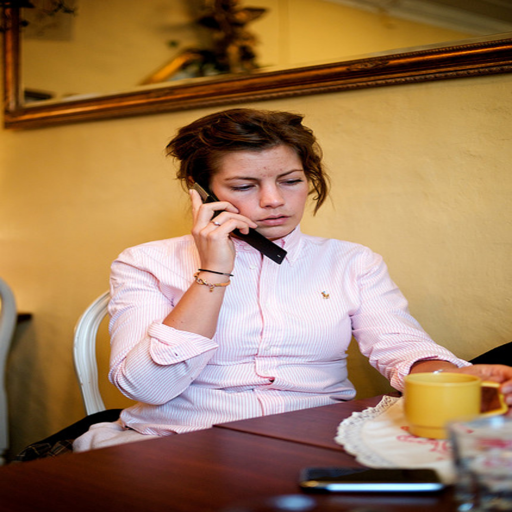

time: 130 ms (started: 2023-11-25 13:38:14 +00:00)


In [ ]:
img = cv2.imread(f'/content/drive/MyDrive/192s2a/Data2/Distored/resize/{file[:-4]}.png')
img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
cv2_imshow(img)

In [ ]:
predictions = predictor(img, "instance")
instances = predictions["instances"].to(cpu_device)

time: 44.4 s (started: 2023-11-25 13:38:14 +00:00)


#### mask

In [ ]:
metadata.thing_classes.index("person")

0

time: 4.2 ms (started: 2023-11-25 13:38:58 +00:00)


In [ ]:
instance = instances[instances.pred_classes == 0]

time: 1.11 ms (started: 2023-11-25 13:38:58 +00:00)


In [ ]:
ref_mask = instance[0].pred_masks.numpy()
ref_mask = ref_mask.astype(np.uint8)
ref_mask = np.squeeze(ref_mask)

time: 1.36 ms (started: 2023-11-25 13:38:58 +00:00)


In [ ]:
ref_mask = np.where(ref_mask==1, 255, ref_mask)
np.unique(ref_mask)

array([  0, 255], dtype=uint8)

time: 7.46 ms (started: 2023-11-25 13:38:58 +00:00)


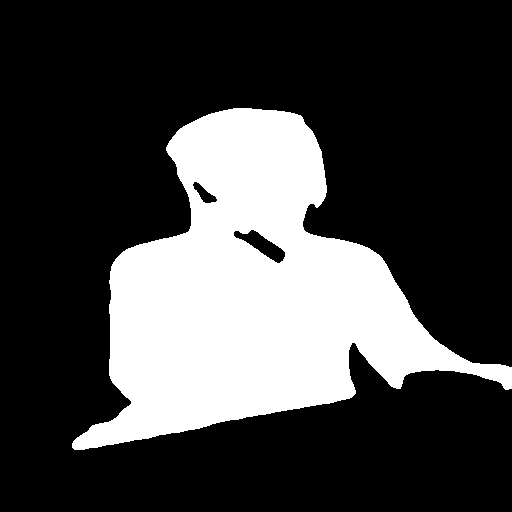

time: 8 ms (started: 2023-11-25 13:38:58 +00:00)


In [ ]:
cv2_imshow(ref_mask)

---

#### 추가 마스크1

In [ ]:
metadata.thing_classes.index("cell phone")

67

time: 2.1 ms (started: 2023-11-25 13:38:58 +00:00)


In [ ]:
instance1 = instances[instances.pred_classes == 67]

time: 1.37 ms (started: 2023-11-25 13:38:58 +00:00)


In [ ]:
ref_mask1 = instance1[1].pred_masks.numpy()
ref_mask1 = ref_mask1.astype(np.uint8)
ref_mask1 = np.squeeze(ref_mask1)

time: 1.91 ms (started: 2023-11-25 13:38:58 +00:00)


In [ ]:
ref_mask1 = np.where(ref_mask1==1, 255, ref_mask1)
np.unique(ref_mask1)

array([  0, 255], dtype=uint8)

time: 10.2 ms (started: 2023-11-25 13:38:59 +00:00)


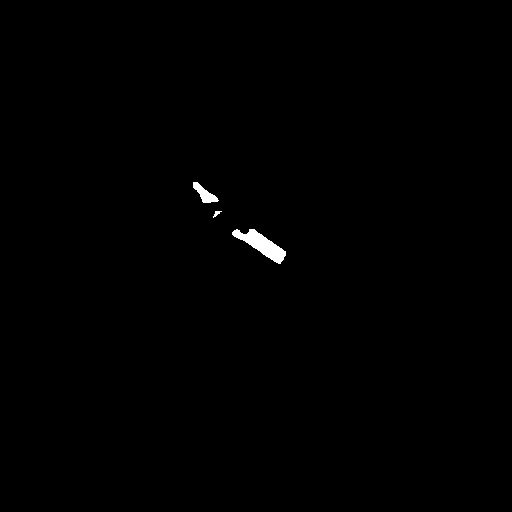

time: 6.86 ms (started: 2023-11-25 13:38:59 +00:00)


In [ ]:
cv2_imshow(ref_mask1)

#### 추가 마스크 2

In [ ]:
metadata.thing_classes.index("handbag")

In [ ]:
instance2 = instances[instances.pred_classes == 26]

In [ ]:
ref_mask2 = instance2[0].pred_masks.numpy()
ref_mask2 = ref_mask2.astype(np.uint8)
ref_mask2 = np.squeeze(ref_mask2)

In [ ]:
ref_mask2 = np.where(ref_mask2==1, 255, ref_mask2)
np.unique(ref_mask2)

In [ ]:
cv2_imshow(ref_mask2)

---

### 합성 갯수에 맞게 합성

In [ ]:
com_mask = ref_mask+ref_mask1#+ref_mask2

time: 377 µs (started: 2023-11-25 13:38:59 +00:00)


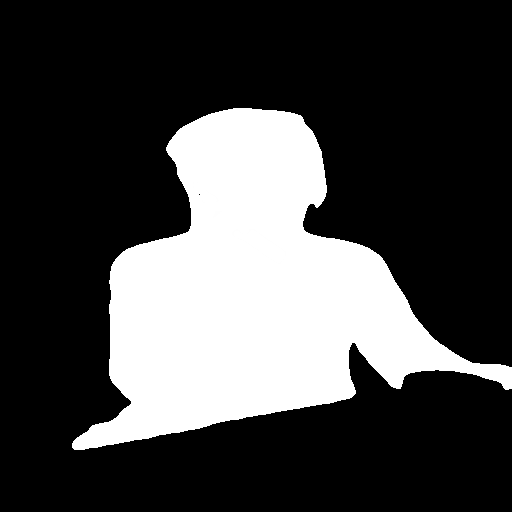

time: 6.44 ms (started: 2023-11-25 13:38:59 +00:00)


In [ ]:
#mask 확인
cv2_imshow(com_mask)

In [ ]:
#mask 저장
cv2.imwrite(f'/content/drive/MyDrive/192s2a/Data2/Distored/oneformer/{file[:-4]}_oneformer.png',com_mask)

True

time: 13.5 ms (started: 2023-11-25 13:38:59 +00:00)


# Image Composition

In [ ]:
src = cv2.imread(f'/content/drive/MyDrive/192s2a/Data2/Distored/resize/{file[:-4]}.png')
src = cv2.rotate(src, cv2.ROTATE_90_COUNTERCLOCKWISE)
mask = cv2.imread(f'/content/drive/MyDrive/192s2a/Data2/Distored/oneformer/{file[:-4]}_oneformer.png', cv2.IMREAD_GRAYSCALE)
dst = cv2.imread(f'/content/drive/MyDrive/192s2a/Data2/Original/lama/background/{img_num[:6]}.png')

time: 27.1 ms (started: 2023-11-25 13:38:59 +00:00)


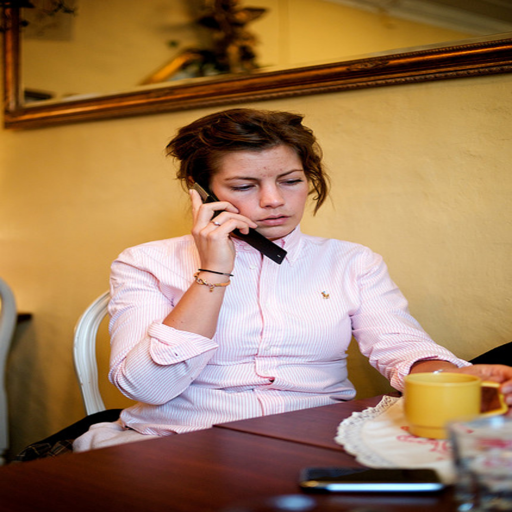

time: 117 ms (started: 2023-11-25 13:38:59 +00:00)


In [ ]:
cv2_imshow(src)

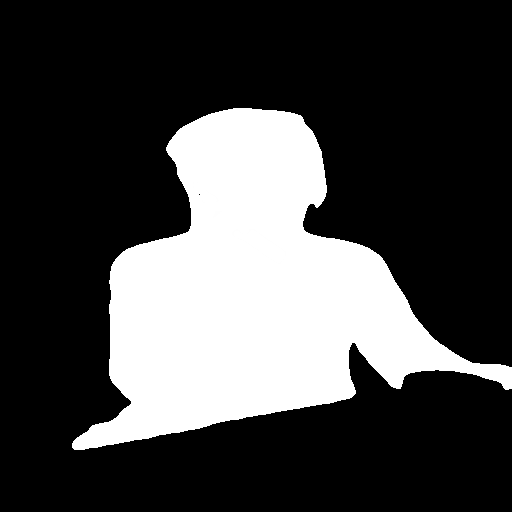

time: 14.2 ms (started: 2023-11-25 13:38:59 +00:00)


In [ ]:
cv2_imshow(mask)

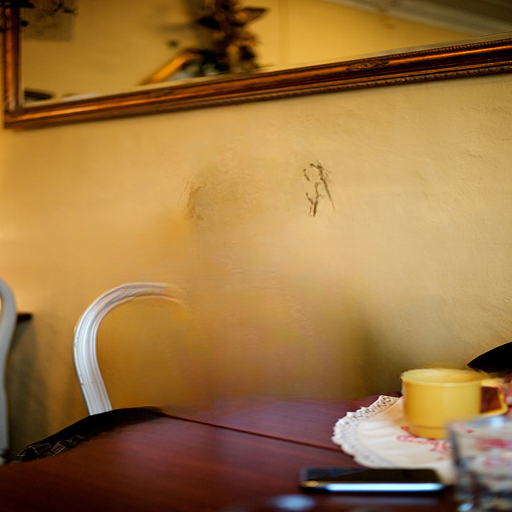

time: 154 ms (started: 2023-11-25 13:38:59 +00:00)


In [ ]:
cv2_imshow(dst)

In [ ]:
result = cv2.copyTo(src,mask,  dst)

time: 543 µs (started: 2023-11-25 13:38:59 +00:00)


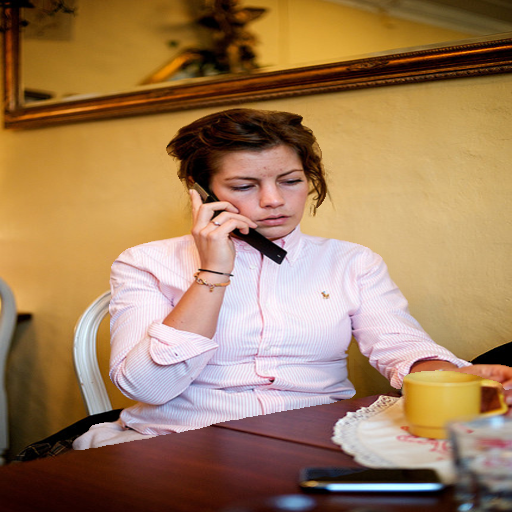

time: 135 ms (started: 2023-11-25 13:38:59 +00:00)


In [ ]:
cv2_imshow(result)

In [ ]:
cv2.imwrite(f'/content/drive/MyDrive/192s2a/Data2/Results/composition/{file[:-4]}.png',result)

True

time: 39 ms (started: 2023-11-25 13:38:59 +00:00)


# Image Resolution

In [ ]:
%cd /content/drive/MyDrive/192s2a/Real-ESRGAN

/content/drive/MyDrive/192s2a/Real-ESRGAN
time: 2.7 ms (started: 2023-11-25 13:38:59 +00:00)


In [ ]:
# Clone realESRGAN
#!git clone https://github.com/xinntao/Real-ESRGAN.git
%cd /content/drive/MyDrive/192s2a/Real-ESRGAN
# Set up the environment
!pip install basicsr
!pip install facexlib
!pip install gfpgan
!pip install -r requirements.txt
!python setup.py develop

# Clone BSRGAN
!git clone https://github.com/cszn/BSRGAN.git

!rm -r SwinIR
# Clone SwinIR
!git clone https://github.com/JingyunLiang/SwinIR.git
!pip install timm

# Download the pre-trained models
!wget https://github.com/cszn/KAIR/releases/download/v1.0/BSRGAN.pth -P BSRGAN/model_zoo
!wget https://github.com/xinntao/Real-ESRGAN/releases/download/v0.1.0/RealESRGAN_x4plus.pth -P experiments/pretrained_models
!wget https://github.com/JingyunLiang/SwinIR/releases/download/v0.0/003_realSR_BSRGAN_DFO_s64w8_SwinIR-M_x4_GAN.pth -P experiments/pretrained_models
!wget https://github.com/JingyunLiang/SwinIR/releases/download/v0.0/003_realSR_BSRGAN_DFOWMFC_s64w8_SwinIR-L_x4_GAN.pth -P experiments/pretrained_models

/content/drive/MyDrive/192s2a/Real-ESRGAN
running develop
/usr/local/lib/python3.10/dist-packages/setuptools/command/easy_install.py:156: EasyInstallDeprecationWarning: easy_install command is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/setuptools/command/install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
running egg_info
writing realesrgan.egg-info/PKG-INFO
writing dependency_links to realesrgan.egg-info/dependency_links.txt
writing requirements to realesrgan.egg-info/requires.txt
writing top-level names to realesrgan.egg-info/top_level.txt
reading manifest file 'realesrgan.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
adding license file 'LICENSE'
writing manifest file 'realesrgan.egg-info/SOURCES.txt'
running build_ext
Creating /usr/local/lib/python3.10/dist-packages/realesrgan.egg-link (link to .)
r

In [ ]:
import os
import glob
from google.colab import files
import shutil
print(' Note1: You can find an image on the web or download images from the RealSRSet (proposed in BSRGAN, ICCV2021) at https://github.com/JingyunLiang/SwinIR/releases/download/v0.0/RealSRSet+5images.zip.\n Note2: You may need Chrome to enable file uploading!\n Note3: If out-of-memory, set test_patch_wise = True.\n')

# test SwinIR by partioning the image into patches
test_patch_wise = False

# to be compatible with BSRGAN
!rm -r BSRGAN/testsets/RealSRSet
upload_folder = 'BSRGAN/testsets/RealSRSet'
result_folder = 'results'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
if os.path.isdir(result_folder):
    shutil.rmtree(result_folder)
os.mkdir(upload_folder)
os.mkdir(result_folder)

 Note1: You can find an image on the web or download images from the RealSRSet (proposed in BSRGAN, ICCV2021) at https://github.com/JingyunLiang/SwinIR/releases/download/v0.0/RealSRSet+5images.zip.
 Note2: You may need Chrome to enable file uploading!
 Note3: If out-of-memory, set test_patch_wise = True.

time: 146 ms (started: 2023-11-25 13:39:47 +00:00)


In [ ]:
import shutil

shutil.copy(f'/content/drive/MyDrive/192s2a/Data2/Results/composition/{file[:-4]}.png','/content/drive/MyDrive/192s2a/Real-ESRGAN/BSRGAN/testsets/RealSRSet')

'/content/drive/MyDrive/192s2a/Real-ESRGAN/BSRGAN/testsets/RealSRSet/000024_0_0_0_50_0.png'

time: 14.8 ms (started: 2023-11-25 13:39:47 +00:00)


In [ ]:
from PIL import Image
img = Image.open(f'/content/drive/MyDrive/192s2a/Data2/Original/resize/{img_num[:-4]}.png')
original_size = img.size

file_list = os.listdir('/content/drive/MyDrive/192s2a/Real-ESRGAN/BSRGAN/testsets/RealSRSet')

for file_name in file_list:
  img = Image.open(f'/content/drive/MyDrive/192s2a/Real-ESRGAN/BSRGAN/testsets/RealSRSet/{file_name}')
  img_resize = img.resize(original_size) # 이부분
  img_resize.save(f'/content/drive/MyDrive/192s2a/Real-ESRGAN/BSRGAN/testsets/RealSRSet/{file_name}')

time: 161 ms (started: 2023-11-25 13:39:47 +00:00)


In [ ]:
# BSRGAN
!rm -r results
if not test_patch_wise:
  %cd BSRGAN
  !python main_test_bsrgan.py
  %cd ..
  shutil.move('BSRGAN/testsets/RealSRSet_results_x4', 'results/BSRGAN')

# realESRGAN
if test_patch_wise:
  !python inference_realesrgan.py -n RealESRGAN_x4plus --input BSRGAN/testsets/RealSRSet -s 4 --output results/realESRGAN --tile 800
else:
  !python inference_realesrgan.py -n RealESRGAN_x4plus --input BSRGAN/testsets/RealSRSet -s 4 --output results/realESRGAN

# SwinIR
if test_patch_wise:
  !python SwinIR/main_test_swinir.py --task real_sr --model_path experiments/pretrained_models/003_realSR_BSRGAN_DFO_s64w8_SwinIR-M_x4_GAN.pth --folder_lq BSRGAN/testsets/RealSRSet --scale 4 --tile 800
else:
  !python SwinIR/main_test_swinir.py --task real_sr --model_path experiments/pretrained_models/003_realSR_BSRGAN_DFO_s64w8_SwinIR-M_x4_GAN.pth --folder_lq BSRGAN/testsets/RealSRSet --scale 4
shutil.move('results/swinir_real_sr_x4', 'results/SwinIR')

# SwinIR-Large
if test_patch_wise:
  !python SwinIR/main_test_swinir.py --task real_sr --model_path experiments/pretrained_models/003_realSR_BSRGAN_DFOWMFC_s64w8_SwinIR-L_x4_GAN.pth --folder_lq BSRGAN/testsets/RealSRSet --scale 4 --large_model --tile 640
else:
  !python SwinIR/main_test_swinir.py --task real_sr --model_path experiments/pretrained_models/003_realSR_BSRGAN_DFOWMFC_s64w8_SwinIR-L_x4_GAN.pth --folder_lq BSRGAN/testsets/RealSRSet --scale 4 --large_model
shutil.move('results/swinir_real_sr_x4_large', 'results/SwinIR_large')
for path in sorted(glob.glob(os.path.join('results/SwinIR_large', '*.png'))):
  os.rename(path, path.replace('SwinIR.png', 'SwinIR_large.png')) # here is a bug in Colab file downloading: no same-name files

/content/drive/MyDrive/192s2a/Real-ESRGAN/BSRGAN
LogHandlers setup!
23-11-25 13:39:55.252 :       Model Name : BSRGAN
23-11-25 13:39:55.275 :           GPU ID : 0
[3, 3, 64, 23, 32, 4]
23-11-25 13:39:59.748 :       Input Path : testsets/RealSRSet
23-11-25 13:39:59.749 :      Output Path : testsets/RealSRSet_results_x4
23-11-25 13:39:59.750 : ---1 --> BSRGAN --> x4--> 000024_0_0_0_50_0.png
/content/drive/MyDrive/192s2a/Real-ESRGAN
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional_tensor.py:5: UserWarning: The torchvision.transforms.functional_tensor module is deprecated in 0.15 and will be **removed in 0.17**. Please don't rely on it. You probably just need to use APIs in torchvision.transforms.functional or in torchvision.transforms.v2.functional.
  warnings.warn(
Testing 0 000024_0_0_0_50_0
loading model from experiments/pretrained_models/003_realSR_BSRGAN_DFO_s64w8_SwinIR-M_x4_GAN.pth
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning

In [ ]:
# utils for visualization
import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  total_figs = 5
  fig = plt.figure(figsize=(total_figs*12, 14))
  ax1 = fig.add_subplot(1, total_figs, 1)
  plt.title('Input image', fontsize=30)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, total_figs, 2)
  plt.title('BSRGAN (ICCV2021) output', fontsize=30)
  ax2.axis('off')
  ax3 = fig.add_subplot(1, total_figs, 3)
  plt.title('Real-ESRGAN output', fontsize=30)
  ax3.axis('off')
  ax4 = fig.add_subplot(1, total_figs, 4)
  plt.title('SwinIR (ours) output', fontsize=30)
  ax4.axis('off')
  ax5 = fig.add_subplot(1, total_figs, 5)
  plt.title('SwinIR-Large (ours) output', fontsize=30)
  ax5.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2['BSRGAN'])
  ax3.imshow(img2['realESRGAN'])
  ax4.imshow(img2['SwinIR'])
  ax5.imshow(img2['SwinIR-L'])

def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# display each image in the upload folder
print('Note: BSRGAN may be better at face restoration, but worse at building restoration because it uses different datasets in training.')
if test_patch_wise:
  print('BSRGAN does not support "test_patch_wise" mode for now. Set test_patch_wise = False to see its results.\n')
else:
  print('\n')
input_folder = upload_folder
result_folder = 'results/SwinIR'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = {}
  img_output['SwinIR'] = imread(output_path)
  img_output['SwinIR-L'] = imread(output_path.replace('SwinIR/', 'SwinIR_large/').replace('SwinIR.png', 'SwinIR_large.png'))
  if test_patch_wise:
    img_output['BSRGAN'] = img_output['SwinIR']*0+255
  else:
    img_output['BSRGAN'] = imread(output_path.replace('SwinIR', 'BSRGAN'))
  path = output_path.replace('/SwinIR/', '/realESRGAN/').replace('_SwinIR.png','_out{}'.format(os.path.splitext(input_path)[1]))
  if os.path.exists(path):
    shutil.move(path, path.replace('_out.', '_realESRGAN.'))
  img_output['realESRGAN'] = imread(path.replace('_out.', '_realESRGAN.'))

  display(img_input, img_output)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#shutil.rmtree('/content/drive/MyDrive/Deep_Experiment/Experiment/Data/Results/ESRGAN')

time: 364 µs (started: 2023-11-25 13:41:15 +00:00)


In [ ]:
### 이 부분은 처음에 돌릴때는 직ㄱ접 드라이브가서 이름 바꿔줘야해

try:
  shutil.copytree('/content/drive/MyDrive/192s2a/Real-ESRGAN/results/SwinIR',f'/content/drive/MyDrive/192s2a/Data2/Results/{fold}')
except:
  shutil.copyfile(f'/content/drive/MyDrive/192s2a/Real-ESRGAN/results/SwinIR/{file[:-4]}_SwinIR.png', f'/content/drive/MyDrive/192s2a/Data2/Results/{fold}/{file[:-4]}_output.png')

time: 912 ms (started: 2023-11-25 13:41:15 +00:00)


time: 939 ms (started: 2023-11-25 13:41:15 +00:00)
